## CiFAR 이미지 분류 모델 구현
- 데이터 : CiFAR10 https://www.cs.toronto.edu/~kriz/cifar.html
- 학습 방법 : 10가지 이미지 종류 분류 => 다중분류
- 이미지 : DNN(MLP), CNN

In [143]:
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.cifar10 import load_data
import numpy as np
import matplotlib.pyplot as plt

In [144]:
# W,b 고정하도록 seed 설정
set_random_seed(11)

---
### [1] 데이터 로딩 및 준비

In [145]:
(x_train, y_train), (x_test, y_test) = load_data()

In [146]:
print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}, y_train.shape : {y_test.shape}')

x_train.shape : (50000, 32, 32, 3), y_train.shape : (50000, 1)
x_test.shape : (10000, 32, 32, 3), y_train.shape : (10000, 1)


---
## [2] 데이터 전처리 및 학습형태로 변환

In [147]:
# 스케일링 => 픽셀 / 255.0
x_train=x_train/255.0
x_test=x_test/255.0

In [148]:
# Conv 레이어는 이미지의 채널 정보까지 입력
x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

In [149]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, random_state=11, test_size=0.2)

In [150]:
print(f'x_train.shape : {x_train.shape}')
print(f'x_val.shape : {x_val.shape}')
print(f'y_train.shape : {y_train.shape}')
print(f'y_val.shape : {y_val.shape}')

x_train.shape : (40000, 32, 32, 3)
x_val.shape : (10000, 32, 32, 3)
y_train.shape : (40000, 1)
y_val.shape : (10000, 1)


---
## [3-1] 모델 구성

In [151]:
model=Sequential()

In [152]:
# 이미지 특징 추출 Layer => 첫번째 입력값 설정
model.add(Conv2D(2, kernel_size=3, padding='same', input_shape=(32,32,3)))

In [153]:
# 이미지 특징 다른 샘플링 Layer => MaxPool2D
model.add(MaxPool2D())

In [154]:
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [155]:
# 출력층 => Node : 10개(0~9), activation : softmax
model.add(Dense(10, activation='softmax'))

In [156]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 2)         56        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 2)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 5,186
Trainable params: 5,186
Non-trainable params: 0
_________________________________________________________________


In [157]:
plot_model(model, show_shapes=True, show_dtype=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


---
## [3-2] 모델 생성
- compile 메서드

In [158]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

---
## [3-3] 모델 학습
- fit 메서드

In [159]:
result = model.fit(x_train, y_train, epochs=40, validation_data=(x_val,y_val))

Epoch 1/40
1250/1250 [==============================] - 11s 8ms/step - loss: 1.8938 - accuracy: 0.3283 - val_loss: 1.7890 - val_accuracy: 0.3814
Epoch 2/40
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7642 - accuracy: 0.3876 - val_loss: 1.7442 - val_accuracy: 0.4018
Epoch 3/40
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7309 - accuracy: 0.4002 - val_loss: 1.7285 - val_accuracy: 0.4044
Epoch 4/40
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7048 - accuracy: 0.4087 - val_loss: 1.7105 - val_accuracy: 0.4098
Epoch 5/40
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6816 - accuracy: 0.4189 - val_loss: 1.6944 - val_accuracy: 0.4170
Epoch 6/40
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6636 - accuracy: 0.4261 - val_loss: 1.6772 - val_accuracy: 0.4208
Epoch 7/40
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6463 - accuracy: 0.4308 - val_loss: 1.6645 - val_accuracy

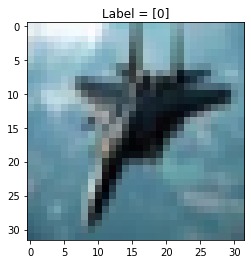

In [160]:
plt.imshow(x_val[0].reshape(32, 32, 3), cmap='gray_r')
plt.title(f'Label = {y_val[0]}')
plt.show()

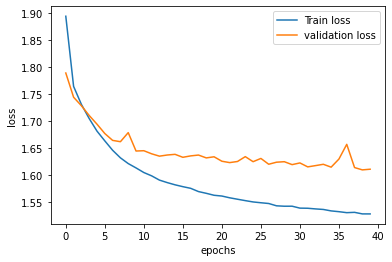

In [161]:
# loss 비교
plt.plot(result.epoch, result.history['loss'],label='Train loss')
plt.plot(result.epoch, result.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

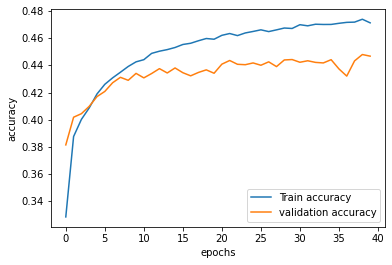

In [162]:
# accuracy 비교
plt.plot(result.epoch, result.history['accuracy'],label='Train accuracy')
plt.plot(result.epoch, result.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

---
## [4] 테스트 평가
- evaluate 메서드
- 테스트 데이터, 테스트 라벨

In [163]:
predict_y = model.predict(x_test[0].reshape(-1, 32, 32, 3))

1/1 [==============================] - 0s 57ms/step


In [164]:
predict_y.round(2), predict_y.shape

(array([[0.1 , 0.08, 0.12, 0.31, 0.01, 0.17, 0.13, 0.03, 0.04, 0.01]],
       dtype=float32),
 (1, 10))

In [165]:
y_test[0]

array([3], dtype=uint8)

In [166]:
# pilimg를 사용하여 이미지를 불러온다
import PIL.Image as pilimg
import numpy as np

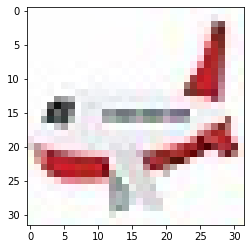

In [167]:
# 불러온 이미지를 matplot으로 나타내기 위해 numpy array로 만든다
# pilimg.open : 이미지를 불러온다.
# image.show() : 이미지를 띄운다.
# np.array(image) : 불러온 이미지를 Numpy Array로 만든다.
airplane = pilimg.open('airplane_image.jpg')
airplane.show()

pix=np.array(airplane)

plt.imshow(pix)

In [168]:
predict_airplane = model.predict(pix.reshape(-1, 32, 32, 3))
predict_airplane

1/1 [==============================] - 0s 39ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [169]:
# airplane
# automobile
# bird
# cat
# deer
# dog
# frog
# horse
# ship
# truck

In [ ]:
# # 새로운 사진 예측 함수
# def pre_print(imagefile):
#     pre_val=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#     # 이미지 불러오기
#     test_image=Image.open('C:/deeplearning/0915/'+imagefile).resize((32,32))
#     test_image_arr=np.array(test_image)

#     # 이미지 그래프로 그리기
#     plt.imshow(test_image)
#     plt.show()

#     # 예측
#     result=np.round(model.predict(test_image_arr.reshape(-1,32,32,3)),2)
#     print(f"""예측값은 {result}\n
#           어떤동물일까요??? {pre_val[result.argmax()]}""")